In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
%matplotlib inline

In [2]:
def testerka(a, b, func, n, degree=20):
    linsp = np.linspace(a, b, 10000)
    x = np.linspace(a, b, n)

    z = np.polyfit(x, np.vectorize(func)(x), degree)
    p = np.poly1d(z)

    f_norm = 0
    for i in linsp:
        f_norm = max(f_norm, abs(p(i) - func(i)))
    
    n_s = np.arange(n)
    x_chebysv =  np.vectorize(lambda j: (b - a) / 2 * np.cos(((2*j + 1)/ (2*n)) * np.pi) + (a + b) / 2)(n_s)
    z_chebysv = np.polyfit(x_chebysv, np.vectorize(func)(x_chebysv), degree)
    p_chebysv = np.poly1d(z_chebysv)
    
    f_norm_chebysv = 0
    for i in linsp:
        f_norm_chebysv = max(f_norm_chebysv, abs(p_chebysv(i) - func(i)))
    
    plt.plot(linsp, np.vectorize(func)(linsp), 'r', linsp, p_chebysv(linsp), 'g', linsp, p(linsp), 'orange')

    return (f_norm, f_norm_chebysv)

(0.09825055071256972, 0.005839798537801033)

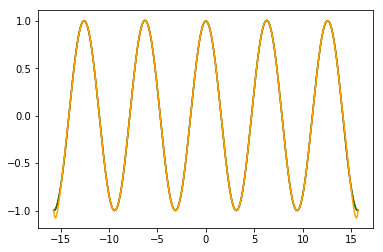

In [3]:
testerka(-5*np.pi, 5*np.pi, np.cos, 38)

(4.615630656409278, 0.008744628652559872)

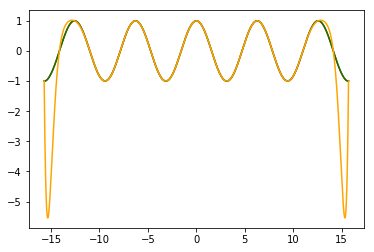

In [4]:
testerka(-5*np.pi, 5*np.pi, np.cos, 21)

(1.1401251377286905, 1.279394397569893)

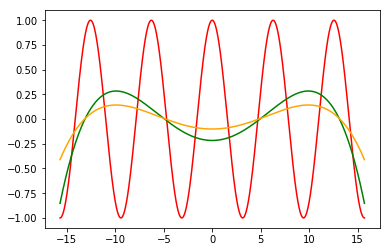

In [5]:
testerka(-5*np.pi, 5*np.pi, np.cos, 50000, degree=5)

In [6]:
def lagrange_testerka(a, b, func, n, degree=20):
    linsp = np.linspace(a, b, 10000)
    x = np.linspace(a, b, n)

    p = lagrange(x, np.vectorize(func)(x))

    f_norm = 0
    for i in linsp:
        f_norm = max(f_norm, abs(p(i) - func(i)))
    
    n_s = np.arange(n)
    x_chebysv =  np.vectorize(lambda j: (b - a) / 2 * np.cos(((2*j + 1)/ (2*n)) * np.pi) + (a + b) / 2)(n_s)
    p_chebysv = lagrange(x_chebysv, np.vectorize(func)(x_chebysv))
    
    f_norm_chebysv = 0
    for i in linsp:
        f_norm_chebysv = max(f_norm_chebysv, abs(p_chebysv(i) - func(i)))
    
    plt.plot(linsp, np.vectorize(func)(linsp), 'r', linsp, p_chebysv(linsp), 'g', linsp, p(linsp), 'orange')

    return (f_norm, f_norm_chebysv)

(0.4383571349733774, 0.40201687662993507)

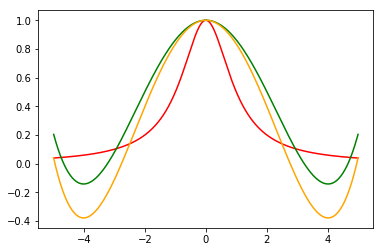

In [28]:
lagrange_testerka(-5, 5, lambda x: 1/(1 + x **2), 5)

(22732975255.47477, 33060141.068599686)

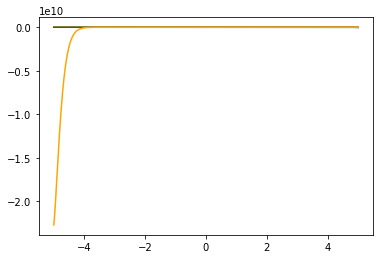

In [29]:
lagrange_testerka(-5, 5, lambda x: 1/(1 + x **2), 50)

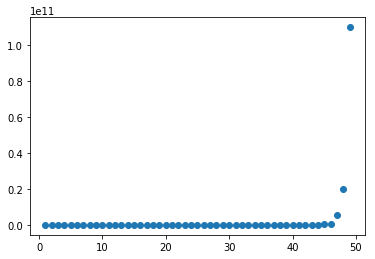

In [23]:
f_norm_array = []
f_norm_chebysv_array = []
Iters = 50
for i in range(1, Iters):
    f_norm, f_norm_chebysv = (lagrange_testerka(-5, 5, lambda x: 1/(1 + x **2), i))
    f_norm_array.append(f_norm)
    f_norm_chebysv_array.append(f_norm_chebysv)

plt.clf()
plt.scatter(np.arange(1, Iters), f_norm_array)

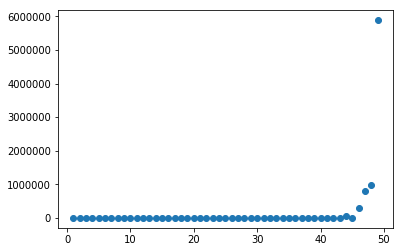

In [24]:
plt.clf()
plt.scatter(np.arange(1, Iters), f_norm_chebysv_array)